In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams["figure.dpi"] = 300

In [2]:
df = sns.load_dataset("tips")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.corr(numeric_only = True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [7]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
# df[df["total_bill"] > 40]

In [9]:
# df.query("total_bill > 40")

In [10]:
df.filter(items = ["day", "sex", "total_bill"])

,day,sex,total_bill
0,Sun,Female,16.99
1,Sun,Male,10.34
2,Sun,Male,21.01
3,Sun,Male,23.68
4,Sun,Female,24.59
...,...,...,...
239,Sat,Male,29.03
240,Sat,Female,27.18
241,Sat,Male,22.67
242,Sat,Male,17.82


In [11]:
df.filter(items = ["day", "sex", "total_bill"]).query("sex == 'Female'")

,day,sex,total_bill
0,Sun,Female,16.99
4,Sun,Female,24.59
11,Sun,Female,35.26
14,Sun,Female,14.83
16,Sun,Female,10.33
...,...,...,...
226,Fri,Female,10.09
229,Sat,Female,22.12
238,Sat,Female,35.83
240,Sat,Female,27.18


In [12]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [13]:
df.day.nunique()

4

In [14]:
df.nsmallest(5, columns = "total_bill")

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


In [15]:
df.nlargest(5, columns = "total_bill")

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [16]:
df.sex.value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [17]:
df.assign(total = lambda x: x.total_bill + x.tip)

,total_bill,tip,sex,smoker,day,time,size,total
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,34.95
240,27.18,2.00,Female,Yes,Sat,Dinner,2,29.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,24.67
242,17.82,1.75,Male,No,Sat,Dinner,2,19.57


In [18]:
df["total"] = df.total_bill + df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,total
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20


In [19]:
plt.rcParams["figure.figsize"] = [10,5]

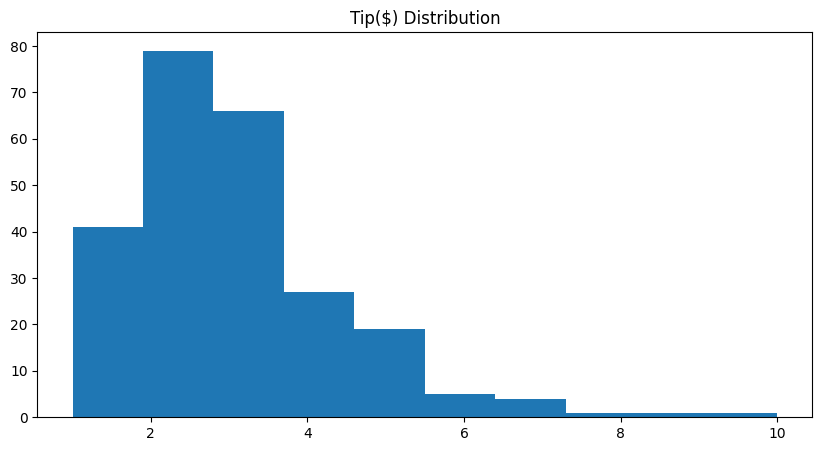

In [20]:
plt.hist(df.tip)
plt.title("Tip($) Distribution");

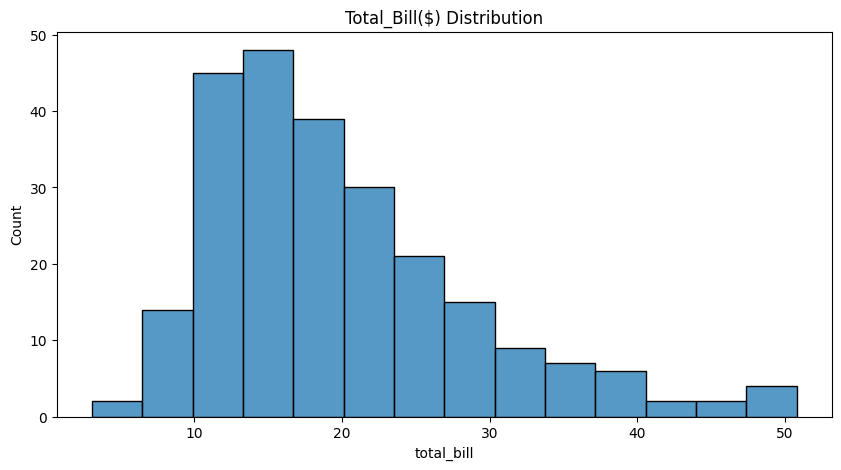

In [21]:
sns.histplot(df.total_bill)
plt.title("Total_Bill($) Distribution");

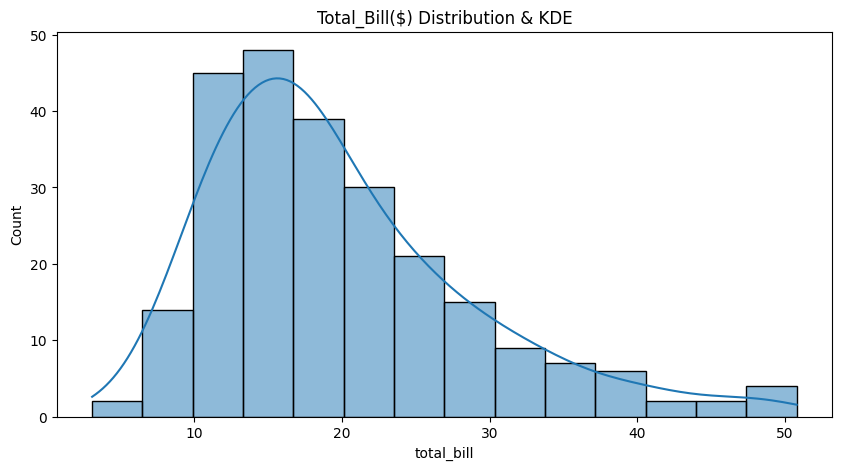

In [22]:
sns.histplot(df.total_bill, kde = True)
plt.title("Total_Bill($) Distribution & KDE");

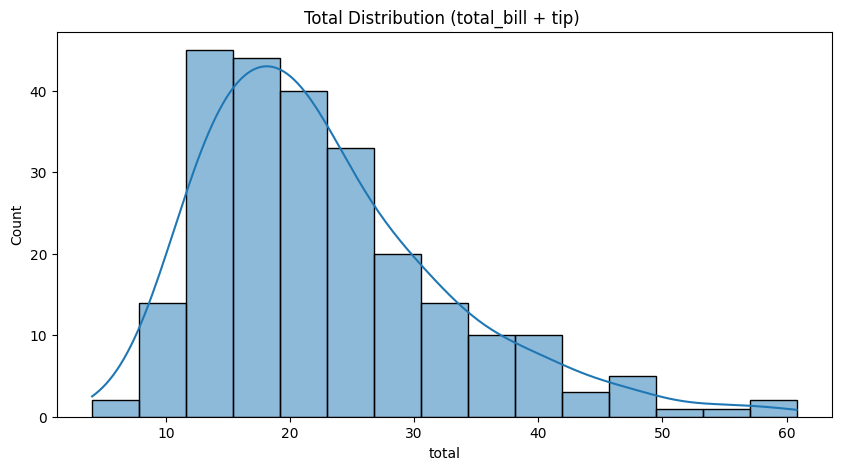

In [23]:
sns.histplot(df.total, kde = True)
plt.title("Total Distribution (total_bill + tip) ");

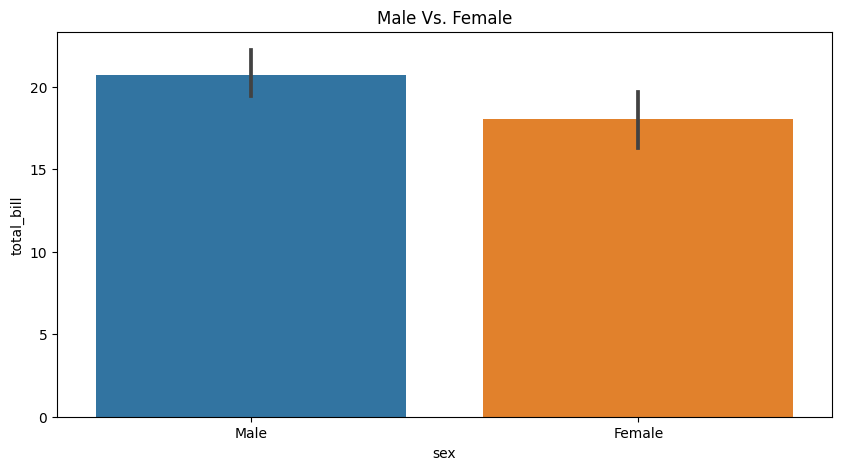

In [24]:
sns.barplot(data = df, x = "sex", y = "total_bill")
plt.title("Male Vs. Female");

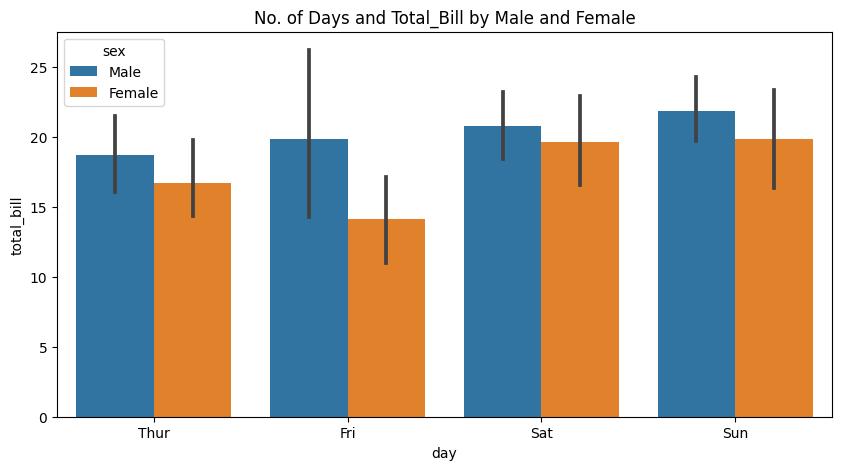

In [25]:
sns.barplot(data = df, x = "day", y = "total_bill", hue = "sex")
plt.title("No. of Days and Total_Bill by Male and Female");

In [26]:
# Outlier detection

# 1. IQR
# 2. Upper Fence
# 3. Lower Fence

# 1. Calculating 25th(Q1) and 75th(Q3) quartile
Q1, Q3 = np.quantile(df["tip"], [0.25, 0.75])

# 2. IQR
IQR = Q3 - Q1

# 3. Upper and Lower Fence
lowerFence = Q1 - (Q1 * 1.5)
upperFence = Q3 + (Q3 * 1.5)

# Detecting outliers using upper and lower fence
outliers = []
for i in df["tip"]:
    if i > upperFence or i < lowerFence:
        outliers.append(i)

print("The outliers are:", outliers)

The outliers are: [10.0, 9.0]


In [27]:
# Outlier detection via Z-Score

# 1. Mean
# 2. Standard Deviation
# 3. Threshold Value

def outlier_detection(data):
    # 1. Mean calculation
    mean = np.mean(data)

    # 2. Standard deviation calculation
    std = np.std(data)

    # 3. Threshold (e.g..2,3)
    threshold = 3

    # Calculating Z-Score
    z_score = np.abs((data - mean)/std)

    # Detecting the outliers
    outliers = []
    for i in z_score:
        if i > threshold:
            outliers.append(i)
    print("The outliers are:", outliers)

In [28]:
outlier_detection(df.tip)

The outliers are: [3.3181644442898395, 5.070771687133162, 4.34655381818964]


In [29]:
# To know the no. of smokers in lunch and dinner
df.groupby(["time","sex","smoker"]).size()

time    sex     smoker
Lunch   Male    Yes       13
                No        20
        Female  Yes       10
                No        25
Dinner  Male    Yes       47
                No        77
        Female  Yes       23
                No        29
dtype: int64

In [30]:
# calculating the total_bill and tip by size
df.groupby(["time", "size"])[["total_bill", "tip"]].sum()

total_bill     tip
time   size                    
Lunch  1          18.65    3.75
       2         774.11  126.00
       3          92.62   13.77
       4         149.75   21.09
       5          41.19    5.00
       6          91.15   15.90
Dinner 1          10.32    2.00
       2        1791.78  276.84
       3         791.93  115.17
       4         908.95  131.92
       5         109.15   15.14
       6          48.17    5.00

In [31]:
# average total_bill and tip by sex
df.groupby("sex")[["total_bill", "tip"]].mean()

,total_bill,tip
sex,,
Male,20.744076,3.089618
Female,18.056897,2.833448


In [35]:
# average total_bill & tip by day and smoker
df.groupby(["day","smoker"])[["total_bill", "tip"]].mean().sort_values(by = "total_bill", ascending = False)

,,total_bill,tip
day,smoker,,
Sun,Yes,24.120000,3.516842
Sat,Yes,21.276667,2.875476
Sun,No,20.506667,3.167895
Sat,No,19.661778,3.102889
Thur,Yes,19.190588,3.030000
Fri,No,18.420000,2.812500
Thur,No,17.113111,2.673778
Fri,Yes,16.813333,2.714000
